<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import Packages</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#How-many-customers-churn-the-credit-card-service?" data-toc-modified-id="How-many-customers-churn-the-credit-card-service?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How many customers churn the credit card service?</a></span></li><li><span><a href="#Histograms-for-Numerical-variables" data-toc-modified-id="Histograms-for-Numerical-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Histograms for Numerical variables</a></span></li><li><span><a href="#Bar-charts-for-categorical-variables" data-toc-modified-id="Bar-charts-for-categorical-variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Bar charts for categorical variables</a></span></li><li><span><a href="#Correlation-between-numerical-variables" data-toc-modified-id="Correlation-between-numerical-variables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Correlation between numerical variables</a></span></li><li><span><a href="#Summary-for-visualization" data-toc-modified-id="Summary-for-visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Summary for visualization</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning-for-Models" data-toc-modified-id="Data-Cleaning-for-Models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Cleaning for Models</a></span></li><li><span><a href="#Pipeline-for-ML" data-toc-modified-id="Pipeline-for-ML-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Pipeline for ML</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-Cleaning-&amp;-Wrangling" data-toc-modified-id="Data-Cleaning-&amp;-Wrangling-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span><strong>Data Cleaning &amp; Wrangling</strong></a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span><strong>Data Visualization</strong></a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span><strong>Models</strong></a></span></li></ul></li></ul></li></ul></div>

# Credit Card Customers

### Introduction

Customer Churn (customer attrition) is the most challenge problem for business such as credit cards or telecommunication companies etc. Building models to predict who is going to churn would help improve business, and companies can prevent from losing their customers. 

In this project, I analyzed [credit card customers' dataset](https://www.kaggle.com/sakshigoyal7/credit-card-customers) and built machine learning (ML) models to predict who churn the service. More details for the dataset is [here](https://leaps.analyttica.com/sample_cases/11).

I created several graphs to solve the questions below:

>>**Question1**: How many people decided to not continue the credit card service? 

>>**Question2**: Any differences between Churn and Exist groups depending on each feature?

>>**Question3**: Are there correlations between numerical variables?


### Import Packages

In [1]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
from collections import Counter
warnings.filterwarnings('ignore')

import sys
from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/CreditCard'

In [43]:
# Visualizations libraries
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

In [3]:
# Data pre-processing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


# Modelling 
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
import xgboost as xgb


# Evaluation & CV
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import KFold, cross_val_score


# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# SMOTE
from imblearn.over_sampling import BorderlineSMOTE


In [4]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/CreditCard/Data')

## Data Cleaning

In [5]:
df = pd.read_csv(path/'BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
# drop two columns that we do not need for this project
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
       axis=1, inplace=True)
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [8]:
# see if we have missing values in data set
df.isnull().sum()/len(df)

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [9]:
# change columns' name for convenience 
df = df.rename(columns={'CLIENTNUM': 'Customer_Id',
                       })

In [10]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [11]:
# Change income and churn variables for convenience 
income_dict = {'$60K - $80K': '60K-80K',
              'Less than $40K':'<40K',
              '$80K - $120K': '80K-120K',
              '$40K - $60K': '40K-60K',
              '$120K +': '>120K',
              'Unknown': 'Unknown'}

churn_dict = {'Existing Customer': 'Exist',
             'Attrited Customer': 'Churn'}

df['Income'] = df['Income_Category'].map(income_dict)
df['Churn'] = df['Attrition_Flag'].map(churn_dict)
df.drop(['Attrition_Flag','Income_Category'], axis=1, inplace=True)

In [12]:
#edu_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Doctorate', 'Post_Graduate', 'Unknown']
#df['Education_Level'] = df['Education_Level'].astype('category')
#df['Education_Level'] = df['Education_Level'].cat.set_categories(new_categories=edu_order, ordered=True)
#df['Education_Level'].unique()

In [13]:
df.head()

Customer_Id  Customer_Age Gender  Dependent_count Education_Level  \
0    768805383            45      M                3     High School   
1    818770008            49      F                5        Graduate   
2    713982108            51      M                3        Graduate   
3    769911858            40      F                4     High School   
4    709106358            40      M                3      Uneducated   

  Marital_Status Card_Category  Months_on_book  Total_Relationship_Count  \
0        Married          Blue              39                         5   
1         Single          Blue              44                         6   
2        Married          Blue              36                         4   
3        Unknown          Blue              34                         3   
4        Married          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio    Income  Churn  
0                  0.061   60K-80K  Exist  
1                  0.105      <40K  Exist  
2                  0.000  80K-120K  Exist  
3                  0.760      <40K  Exist  
4                  0.000   60K-80K  Exist

## Data Visualization

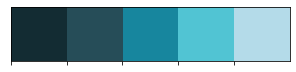

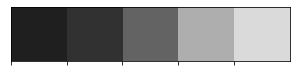

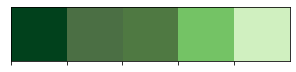

In [14]:
# set up the colors for visualization
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_green)

### How many customers churn the credit card service?

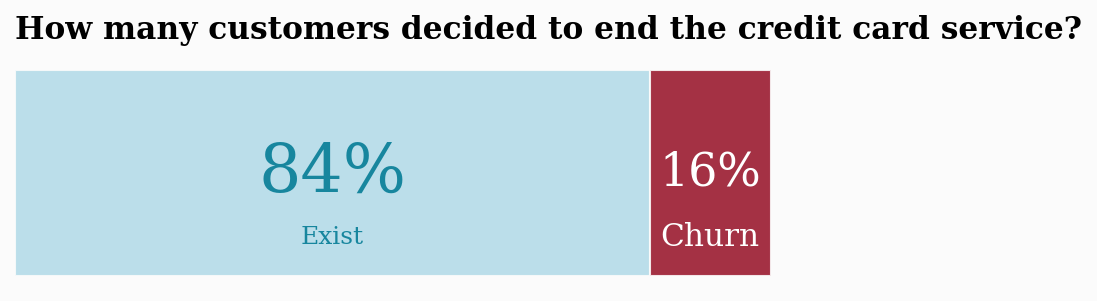

In [194]:
# Create data to present
x = df.groupby(['Churn'])['Churn'].count()
y = len(df)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2), dpi=150)
background_color = '#fbfbfb'
fig.patch.set_facecolor(background_color) # set up background color
ax.set_facecolor(background_color) # set up background color

# Create barh graph
ax.barh(ratio.index, ratio['Exist'], color=colors_blue[4], alpha=0.9, 
       ec=background_color, label='Exist')
ax.barh(ratio.index, ratio['Churn'], left=ratio['Exist'], color='#9b1b30',
       alpha=0.9, ec=background_color, label='Churn')

ax.set_xlim(0,1)
ax.set_xticks([]) # set up xtick as None 
ax.set_yticks([]) # set up ytick as None
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# set up the annotation for data
for i in ratio.index:
    ax.annotate(f"{int(ratio['Exist'][i]*100)}%", xy=(ratio['Exist'][i]/2, i),
               va = 'center', ha= 'center', fontsize=32, fontweight='light',
               fontfamily='serif', color=colors_blue[2])
    ax.annotate('Exist', xy=(ratio['Exist'][i]/2, -0.25), va='center', ha='center',
               fontsize=12, fontweight='light', fontfamily='serif', color=colors_blue[2])

for i in ratio.index:
    ax.annotate(f"{int(ratio['Churn'][i]*100)}%", xy=(ratio['Exist'][i]+ratio['Churn'][i]/2, i),
               va='center', ha='center', fontsize=22, fontweight='light',
               fontfamily='serif', color='white')
    ax.annotate('Churn', xy=(ratio['Exist'][i]+ratio['Churn'][i]/2, -0.25),
               va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif', color='white')


fig.text(0.125, 0.95, 'How many customers decided to end the credit card service?', 
        fontfamily='serif', fontweight='bold', fontsize=15)

plt.show()

### Histograms for Numerical variables 

Let's check out the distribution of the numerical features.

In [48]:
num_feats = df.drop(['Customer_Id', 'Churn'], axis=1).select_dtypes(include=['int64', 'float64']).columns
cat_feats = df.drop(['Customer_Id', 'Churn'], axis=1).select_dtypes(include=['object', 'category']).columns

(Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
        'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
       dtype='object'),
 Index(['Gender', 'Education_Level', 'Marital_Status', 'Card_Category',
        'Income'],
       dtype='object'))

Text(19, 0.065, '- Exist group has binomial distribution, but Churn group shows right-skewed distribution.')

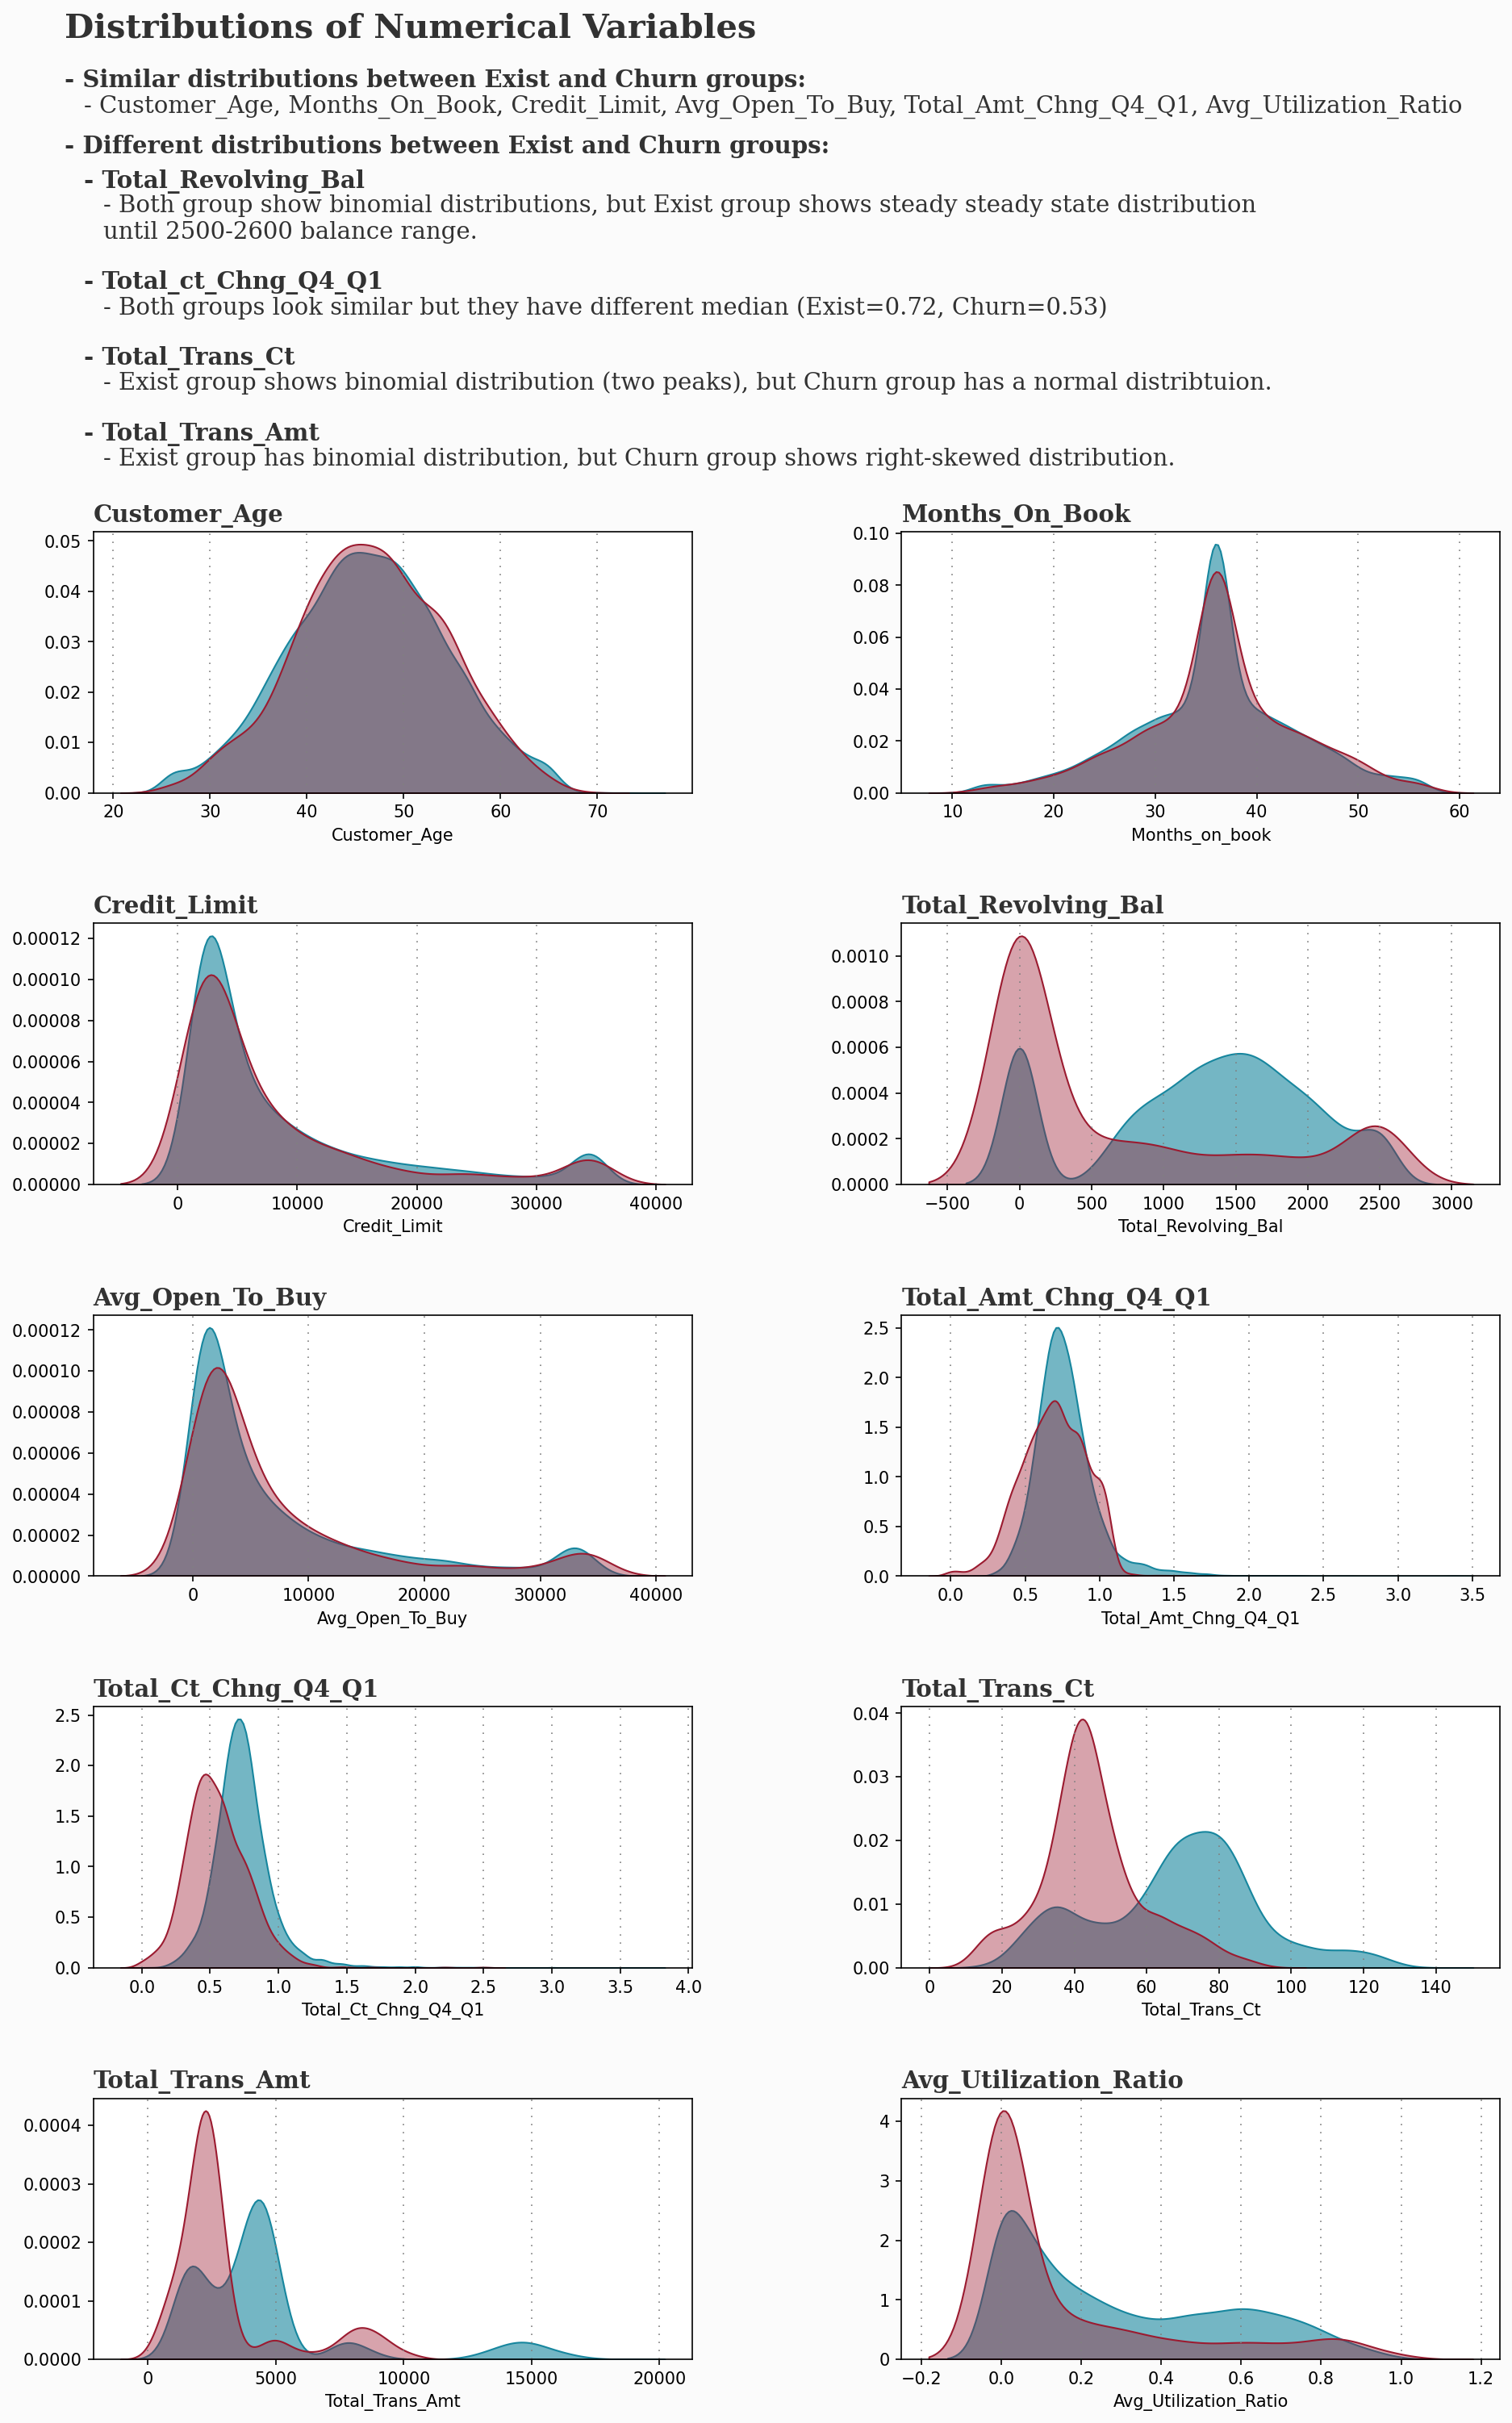

In [165]:
background_color = '#fbfbfb'

fig = plt.figure(figsize=(15,20), dpi=150)
fig.patch.set_facecolor(background_color) # set up background color
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.35, hspace=0.5)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
        fig.add_subplot(gs[0,1]),
        fig.add_subplot(gs[1,0]),
        fig.add_subplot(gs[1,1]),
        fig.add_subplot(gs[2,0]),
        fig.add_subplot(gs[2,1]),
        fig.add_subplot(gs[3,0]),
        fig.add_subplot(gs[3,1]),
        fig.add_subplot(gs[4,0]),
        fig.add_subplot(gs[4,1])]

# numeric columns as a list
num_feats = ['Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal',
             'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1', 
             'Total_Trans_Ct','Total_Trans_Amt', 'Avg_Utilization_Ratio']

def HistPlots(df, xVar, ax):
    """ Function to create histograms for numerical variables
    Args:
        df: dataframe
        xVar: a list for numerical variables
        ax: ax for each graph
    """
    # create histograms
    sns.kdeplot(Exist[xVar], ax=ax, color=colors_blue[2], alpha=0.6, shade=True, label='Exist')
    sns.kdeplot(Churn[xVar], ax=ax, color='#9b1b30', alpha=0.4, shade=True, label='Churn')
    ax.grid(which='major', color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
    #ax.set(yticks=[])
    ax.set_title(f'{xVar}'.title(), fontsize=14, fontweight='bold', fontfamily='serif',
                color='#323232', loc='left')

    ax.set_ylabel('')


# create histograms by using zip
for ax, xVar in zip(axes, num_feats):
    HistPlots(df, xVar, ax)
    

# Add observations
axes[0].text(15, 0.15, 'Distributions of Numerical Variables',
            fontsize=20, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(15, 0.14, '- Similar distributions between Exist and Churn groups:',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(17, 0.135, '- Customer_Age, Months_On_Book, Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Avg_Utilization_Ratio',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(15, 0.127, '- Different distributions between Exist and Churn groups:',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(17, 0.120, '- Total_Revolving_Bal',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.110, '- Both group show binomial distributions, but Exist group shows steady steady state distribution \nuntil 2500-2600 balance range. ',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.100, '- Total_ct_Chng_Q4_Q1',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.095, '- Both groups look similar but they have different median (Exist=0.72, Churn=0.53)',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.085, '- Total_Trans_Ct',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.080, '- Exist group shows binomial distribution (two peaks), but Churn group has a normal distribtuion.',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.070, '- Total_Trans_Amt',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.065, '- Exist group has binomial distribution, but Churn group shows right-skewed distribution.',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')


__Observations for histgrams__:

- __Age:__ Customer age. Both groups show normal distributions. 
- __Months_on_book__: Months on book (Time of Relationship). As we can see in the graph below, both existing and churn groups have similar distribution patterns, and the medians are 36 months. 
- __Credit_Limit:__ Credit limit shows the credit limit on the credit cards. Both existing and churn groups are right-skewed distributions, and there are a lot of people who have 2k-4k credit limits. 
- __Total_Revolving_Bal__: It shows the total revloving balance on the credit card. We can see the differences between exist and churn groups. __1) Churn group distribution__ is more likely to be a normal distribution except for 0-99 total revolving balance range. However, __existing group__ shows steady state distribution until 2500-2600 balance range. There are some similarities between existing and churn groups: __1)__ The highest values of both groups are 0-99 total revolving balance. __2)__ They show high frequencies in 2500-2600 total revolving balances. 
- __Avg_Open_To_Buy__: It shows open to buy credit line (average of last 12 months). Both exist and churn groups show right-skewed distribtuions. 
- __Total_Amt_Chng_Q4_Q1__: It shows total change in transaction amount (Q4 over Q1). Both groups are normal distributions with outliers. Existing group has more outliers. 
- __Total_Ct_Chng_Q4_Q1__: Both distributions show normal distributions, but there are a lot of outliers. 
- __Total_Trans_Ct__: For exist group, it shows binomial distribution. We can see that there are two peaks between 35 and 39, and between 75 and 79. For churn group, it shows a normal distribtuion, and the median is 43. 
- __Total_Trans_Amt:__ Total Transaction Amount (Last 12 months). Both are right skewed distributions but there are some differences between existing and churn groups. __1)__ for existing group, there are a lot of customers in 4000-4999 range, while there are large number of customers in 2000-2999 range for churn group. __2)__ the second most highest value is 1000-1999 range for both groups, but there are few customers who are in the range more than 3000 for churn group. 
- __Avg_Utilization_Ratio:__ Average card utilization ratio. Both groups show right skewed distributions. 





### Bar charts for categorical variables

In [201]:
def barPerc(df, xVar, ax):
    """
    source: https://stackoverflow.com/a/67076347/4852724
    
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                             pandas bar plot)
    """
    # 1. How many X categories
    ## check for NaN and remove
    numX = len([x for x in df[xVar].unique() if x==x])
    
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##     [0, 8, 16, 24] are hue bars for 1st X category
        hueBars = bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                   bar.get_height() - 0.1 * bar.get_height(),
                   f"{bar.get_height()/total:.2%}",
                   ha='center', va='top', color='black')


def GrpSubplots(df, xVar, ax, axis=None, ticklabels=None):
    """
    Create subplots based on X variables
    """
    df.groupby([xVar, 'Churn']).size().unstack('Churn').apply(lambda x: x*100/x.sum(), axis=axis).plot.bar(rot=0,
                                                                                                           width=0.9,
                                                                                                           color=[colors_green[4], colors_blue[4]],
                                                                                                           ax=ax);
    ax.set_title(f'{xVar}'.title(), fontsize=14, fontweight='bold', fontfamily='serif', color='#323232', loc='left')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xticklabels(ticklabels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.get_legend().remove()
    
    barPerc(df, xVar, ax)
    

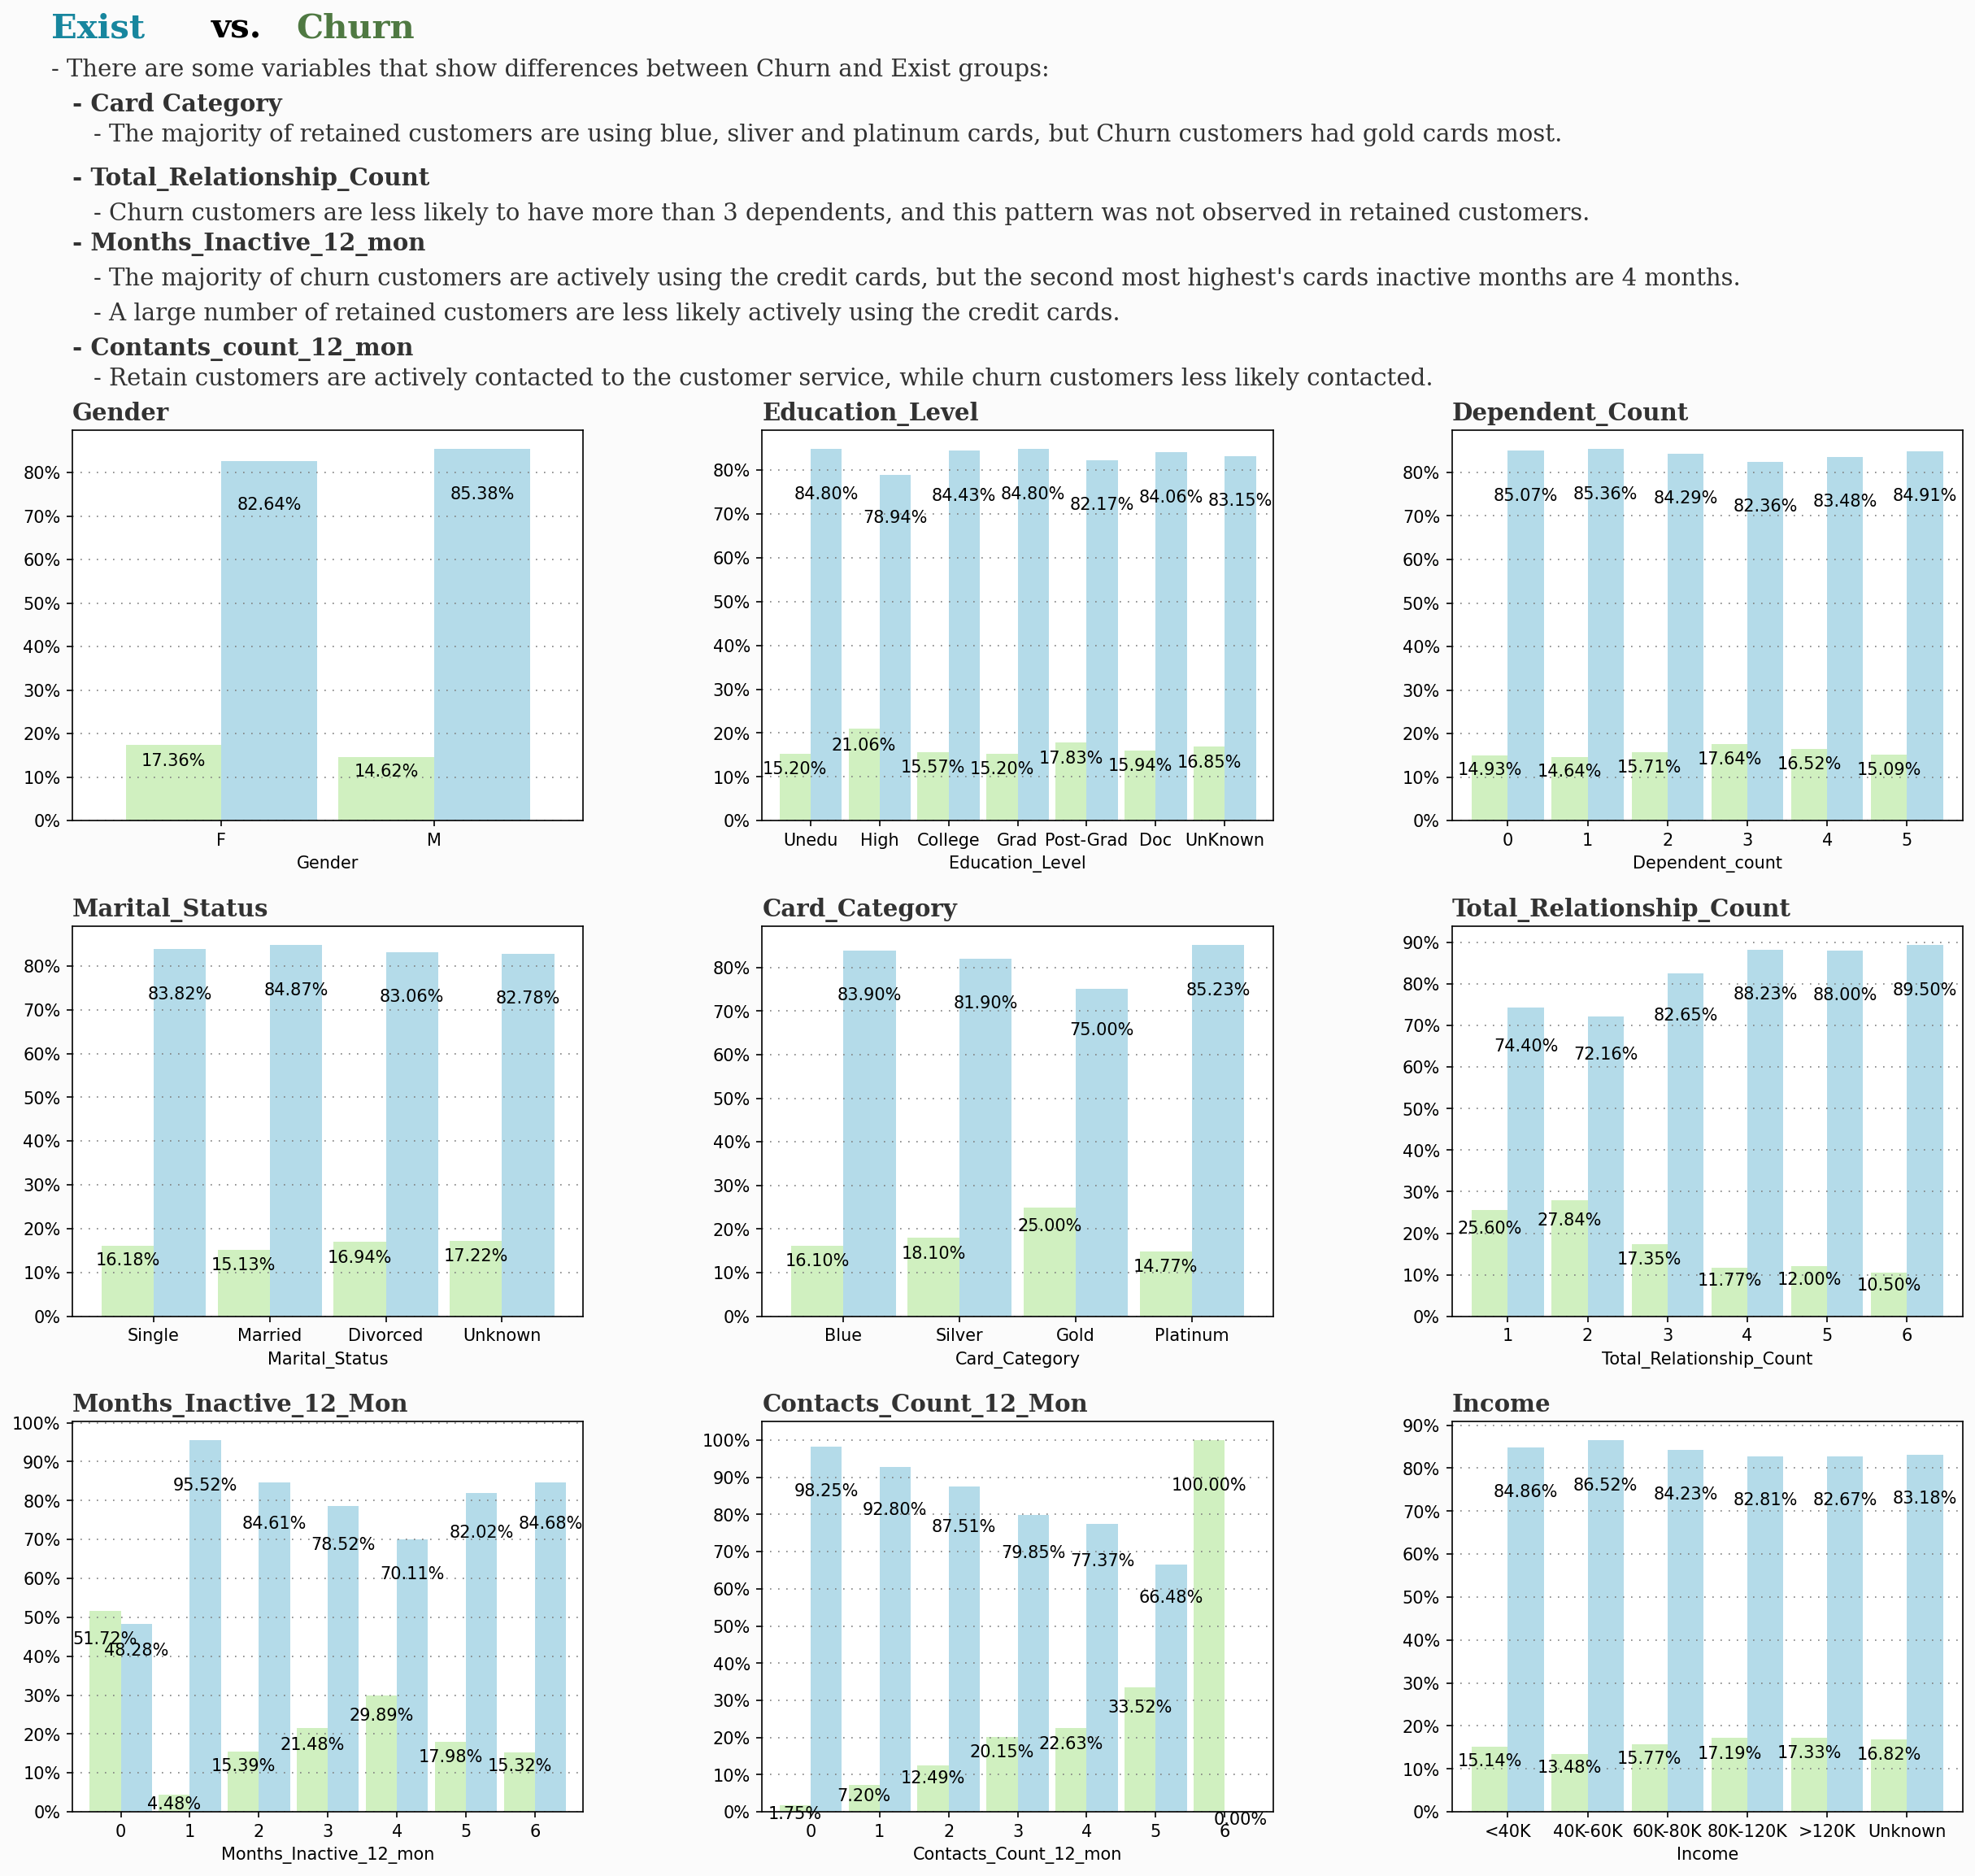

In [223]:
background_color='#fbfbfb'

fig = plt.figure(figsize=(20,15), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.35, hspace=0.27)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[0,2]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[1,2]),
       fig.add_subplot(gs[2,0]),
       fig.add_subplot(gs[2,1]),
       fig.add_subplot(gs[2,2])]

# categories as a list
cats = ['Gender', 'Education_Level', 'Dependent_count', 'Marital_Status', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
       'Income']

# ticklabels as list
tlabs = [['F', 'M']] + [['Unedu', 'High', 'College', 'Grad', 'Post-Grad', 'Doc', 'UnKnown']] + [[0, 1, 2, 3, 4, 5]]+ [['Single', 'Married', 'Divorced', 'Unknown']] + [['Blue', 'Silver', 'Gold', 'Platinum']] + [[1,2,3,4,5,6]] + [[0, 1, 2, 3, 4, 5, 6]]*2 + [['<40K', '40K-60K', '60K-80K', '80K-120K','>120K','Unknown']]

for ax, xVar, ticklabels in zip(axes, cats, tlabs):
    GrpSubplots(df, xVar, ax, axis=1, ticklabels=ticklabels)

# green - churn
# blue - exist

axes[0].text(-0.80, 180, 'Exist', fontsize=20, 
        fontweight='bold', fontfamily='serif', color=colors_blue[2])
axes[0].text(-0.05, 180, 'vs.', fontsize=20,
        fontweight='bold', fontfamily='serif', color='black')
axes[0].text(0.35, 180, 'Churn', fontsize=20,
        fontweight='bold', fontfamily='serif', color=colors_green[2])
axes[0].text(-0.80, 171, '- There are some variables that show differences between Churn and Exist groups:',
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 163, '- Card Category',
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 156, '- The majority of retained customers are using blue, sliver and platinum cards, but Churn customers had gold cards most.',
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 146, '- Total_Relationship_Count',
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 138, "- Churn customers are less likely to have more than 3 dependents, and this pattern was not observed in retained customers.",
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 131, "- Months_Inactive_12_mon",
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 123, "- The majority of churn customers are actively using the credit cards, but the second most highest's cards inactive months are 4 months.",
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.60, 115, "- A large number of retained customers are less likely actively using the credit cards.",
        fontsize=14, fontfamily='serif', color='#323232')

axes[0].text(-0.70, 107, "- Contants_count_12_mon",
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 100, "- Retain customers are actively contacted to the customer service, while churn customers less likely contacted.",
        fontsize=14, fontfamily='serif', color='#323232');




### Correlation between numerical variables

In [230]:
cats = ['Gender', 'Education_Level', 'Dependent_count', 'Marital_Status', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
       'Income']


num_df = df.drop(cats, axis=1)
num_df.head()

Customer_Id  Customer_Age  Months_on_book  Credit_Limit  \
0    768805383            45              39       12691.0   
1    818770008            49              44        8256.0   
2    713982108            51              36        3418.0   
3    769911858            40              34        3313.0   
4    709106358            40              21        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Churn  
0                  0.061  Exist  
1                  0.105  Exist  
2                  0.000  Exist  
3                  0.760  Exist  
4                  0.000  Exist

In [231]:
num_df = num_df.drop(['Customer_Id','Churn'], axis=1)

corr = num_df.corr()
corr

Customer_Age  Months_on_book  Credit_Limit  \
Customer_Age               1.000000        0.788912      0.002476   
Months_on_book             0.788912        1.000000      0.007507   
Credit_Limit               0.002476        0.007507      1.000000   
Total_Revolving_Bal        0.014780        0.008623      0.042493   
Avg_Open_To_Buy            0.001151        0.006732      0.995981   
Total_Amt_Chng_Q4_Q1      -0.062042       -0.048959      0.012813   
Total_Trans_Amt           -0.046446       -0.038591      0.171730   
Total_Trans_Ct            -0.067097       -0.049819      0.075927   
Total_Ct_Chng_Q4_Q1       -0.012143       -0.014072     -0.002020   
Avg_Utilization_Ratio      0.007114       -0.007541     -0.482965   

                       Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                      0.014780         0.001151   
Months_on_book                    0.008623         0.006732   
Credit_Limit                      0.042493         0.995981   
Total_Revolving_Bal               1.000000        -0.047167   
Avg_Open_To_Buy                  -0.047167         1.000000   
Total_Amt_Chng_Q4_Q1              0.058174         0.007595   
Total_Trans_Amt                   0.064370         0.165923   
Total_Trans_Ct                    0.056060         0.070885   
Total_Ct_Chng_Q4_Q1               0.089861        -0.010076   
Avg_Utilization_Ratio             0.624022        -0.538808   

                       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
Customer_Age                      -0.062042        -0.046446       -0.067097   
Months_on_book                    -0.048959        -0.038591       -0.049819   
Credit_Limit                       0.012813         0.171730        0.075927   
Total_Revolving_Bal                0.058174         0.064370        0.056060   
Avg_Open_To_Buy                    0.007595         0.165923        0.070885   
Total_Amt_Chng_Q4_Q1               1.000000         0.039678        0.005469   
Total_Trans_Amt                    0.039678         1.000000        0.807192   
Total_Trans_Ct                     0.005469         0.807192        1.000000   
Total_Ct_Chng_Q4_Q1                0.384189         0.085581        0.112324   
Avg_Utilization_Ratio              0.035235        -0.083034        0.002838   

                       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Customer_Age                     -0.012143               0.007114  
Months_on_book                   -0.014072              -0.007541  
Credit_Limit                     -0.002020              -0.482965  
Total_Revolving_Bal               0.089861               0.624022  
Avg_Open_To_Buy                  -0.010076              -0.538808  
Total_Amt_Chng_Q4_Q1              0.384189               0.035235  
Total_Trans_Amt                   0.085581              -0.083034  
Total_Trans_Ct                    0.112324               0.002838  
Total_Ct_Chng_Q4_Q1               1.000000               0.074143  
Avg_Utilization_Ratio             0.074143               1.000000

In [224]:
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors

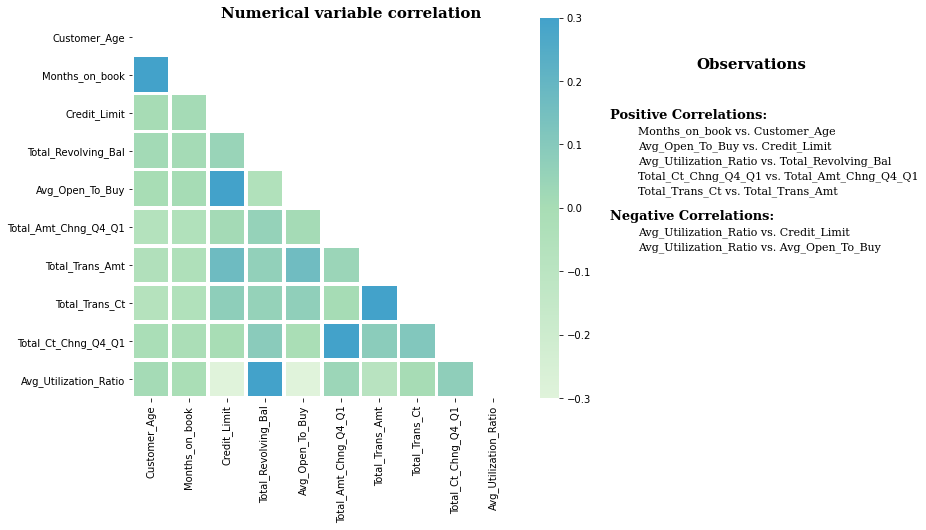

In [247]:
# custom color map 
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#e0f3db', '#a8ddb5', '#43a2ca'])


corr = num_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))
fig.text(.34, .88, 'Numerical variable correlation', fontfamily='serif', fontweight='bold', fontsize=15)
fig.text(1.00,.78, 'Observations', fontfamily='serif', fontweight='bold', fontsize=15)
fig.text(.88, .68, 'Positive Correlations:', fontfamily='serif', fontweight='bold', fontsize=13)
fig.text(.92, .65, 'Months_on_book vs. Customer_Age', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .62, 'Avg_Open_To_Buy vs. Credit_Limit', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .59, 'Avg_Utilization_Ratio vs. Total_Revolving_Bal', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .56, 'Total_Ct_Chng_Q4_Q1 vs. Total_Amt_Chng_Q4_Q1', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .53, 'Total_Trans_Ct vs. Total_Trans_Amt', fontfamily='serif', fontweight='light', fontsize=11)

fig.text(.88, .48, 'Negative Correlations:', fontfamily='serif', fontweight='bold', fontsize=13)
fig.text(.92, .45, 'Avg_Utilization_Ratio vs. Credit_Limit', fontfamily='serif', fontweight='light', fontsize=11)
fig.text(.92, .42, 'Avg_Utilization_Ratio vs. Avg_Open_To_Buy', fontfamily='serif', fontweight='light', fontsize=11)

pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, vmin=-.3, center=0, square=True, linewidths=2.5)
plt.show()



### Summary for visualization

We can see there are some differences between Existing group and Churn groups on __Total_Ct_Chng_Q4_Q1, Total_Trans_Ct, Total_Trans_Amt__

## Models

In [40]:
df.head()

Customer_Id  Customer_Age Gender  Dependent_count Education_Level  \
0    768805383            45      M                3     High School   
1    818770008            49      F                5        Graduate   
2    713982108            51      M                3        Graduate   
3    769911858            40      F                4     High School   
4    709106358            40      M                3      Uneducated   

  Marital_Status Card_Category  Months_on_book  Total_Relationship_Count  \
0        Married          Blue              39                         5   
1         Single          Blue              44                         6   
2        Married          Blue              36                         4   
3        Unknown          Blue              34                         3   
4        Married          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio    Income  Churn  
0                  0.061   60K-80K  Exist  
1                  0.105      <40K  Exist  
2                  0.000  80K-120K  Exist  
3                  0.760      <40K  Exist  
4                  0.000   60K-80K  Exist

### Data Cleaning for Models

Change categorical variables to numerical values

In [41]:
dropcols=['Income', 'Churn', 'Card_Category', 'Marital_Status', 'Education_Level', 'Gender']

# change object variables to numerical variables to build ml models
df['income'] = df['Income'].apply(lambda x: 0 if x == 'Unknown' else 
                                               1 if x == '<40K' else
                                               2 if x == '40K-60K' else
                                               3 if x == '60K-80K' else
                                               4 if x == '80K-120K' else 5)
df['churn'] = df['Churn'].apply(lambda x: 0 if x == 'Exist' else 1)
df['card_category'] = df['Card_Category'].apply(lambda x: 0 if x=='Blue' else
                                               1 if x == 'Sliver' else
                                               2 if x == 'Gold' else 3)

df['gender'] = df['Gender'].apply(lambda x: 0 if x == 'M' else 1)
df['marital_status'] = df['Marital_Status'].apply(lambda x: 0 if x == 'Unknown' else
                                                 1 if x == 'Single' else
                                                 2 if x == 'Married' else 3)

edu_dict = {'Unknown': 0,
            'Uneducated':1,
            'High School': 2,
            'College': 3,
            'Graduate': 4,
            'Doctorate': 5,
            'Post-Graduate': 6}



df['education'] = df['Education_Level'].map(edu_dict)

df.drop(dropcols, axis=1, inplace=True)
df.head()

Customer_Id  Customer_Age  Dependent_count  Months_on_book  \
0    768805383            45                3              39   
1    818770008            49                5              44   
2    713982108            51                3              36   
3    769911858            40                4              34   
4    709106358            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  income  churn  card_category  gender  \
0                  0.061       3      0              0       0   
1                  0.105       1      0              0       1   
2                  0.000       4      0              0       0   
3                  0.760       1      0              0       1   
4                  0.000       3      0              0       0   

   marital_status  education  
0               2          2  
1               1          4  
2               2          4  
3               0          2  
4               2          1

In [42]:
cats = ['income', 'card_category', 'gender', 'marital_status', 'education']
for cat in cats:
    df[cat] = df[cat].astype('category')

In [43]:
#df['churn'] = df['churn'].astype('int64')

In [44]:
df.dtypes

Customer_Id                    int64
Customer_Age                   int64
Dependent_count                int64
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
income                      category
churn                          int64
card_category               category
gender                      category
marital_status              category
education                   category
dtype: object

In [45]:
df.to_csv(path/'df_clean.csv', index=False)

In [46]:
df = pd.read_csv(path/'df_clean.csv')

In [47]:
# make X, y dataset
df_id = df['Customer_Id']
X = df.drop(['Customer_Id','churn'], axis=1)
y = df['churn']

In [48]:
# split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8101, 19), (8101,), (2026, 19), (2026,))

### Pipeline for ML

In [50]:
# To create transformers for the different variable types.  
numeric_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [51]:
# Create numeric and category columns lists
num_feats = X.select_dtypes(include=['int64', 'float64']).columns
cat_feats = X.select_dtypes(include=['object', 'category']).columns

# preprocessor for transfroming numeric and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_trans, num_feats),
        ('cat', cat_trans, cat_feats)]
)

In [52]:
# model selection 
models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('SVC', SVC(kernel='rbf', C=0.025, probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=2)),
    ('RF', RandomForestClassifier()),
    ('ADA', AdaBoostClassifier()),
    ('XGB', GradientBoostingClassifier())
]

# create a name list
fnames = []

for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    pipe.fit(X_train, y_train)
    pipe_prediction = pipe.predict(X_test)    
    df = pd.DataFrame(data=[accuracy_score(y_test, pipe_prediction),
                           recall_score(y_test, pipe_prediction),
                           precision_score(y_test, pipe_prediction),
                           roc_auc_score(y_test, pipe_prediction)],
                     columns = [name + 'Score'], 
                     index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score'])
    df.to_csv(path/'{}.csv'.format(name))
    fnames.append(name)

In [53]:
#fnames = ['LR', 'SVC', 'KNN', 'RF', 'ADA', 'XGB']
table = [pd.read_csv(path/'{}.csv'.format(fname)) for fname in fnames]

df_LR, df_SVC, df_KNN, df_RF, df_ADA, df_XGB = table

# create models_df that have matrix results
models_df = pd.concat(table, axis=1)
models_df.index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score']
models_df.drop('Unnamed: 0', axis=1, inplace=True)

models_df

LRScore  SVCScore  KNNScore   RFScore  ADAScore  XGBScore
Accuracy       0.901283  0.866732  0.883021  0.957058  0.950642  0.965449
Recall         0.541284  0.177370  0.354740  0.798165  0.813456  0.844037
Precision      0.779736  0.983051  0.816901  0.925532  0.872131  0.935593
ROC AUC score  0.755928  0.588391  0.669718  0.892902  0.895250  0.916427

I will choose RF, XGB, and ADA to build ML models and figure out best hyperparameters for each

In [54]:
model_params = {
    'RF':
    {
        'model': RandomForestClassifier(),
        'params':
        {
            'n_estimators': [20, 100, 200, 400],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': list(range(1, 11))
        }
    }, 
    'XGB':
    {
        'model': GradientBoostingClassifier(),
        'params':
        {
            'learning_rate': [0.0001, 0.001, 0.01, 0.1],
            'n_estimators': [100, 200, 500, 1000],
            'max_features': ['sqrt', 'log2'],
            'max_depth': list(range(1,11))
        }
    },
    'ADA':
    {
        'model': AdaBoostClassifier(),
        'params':
        {
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
            'n_estimators': [10, 50, 100, 500]
        }
    }
}

In [55]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores=[]
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params['model'], params['params'], cv=cv, n_iter=20)
    rs.fit(X, y)
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])

# create dataframe to show the best parameter for each model
data = pd.DataFrame(scores, columns=['Model', 'Parameters', 'Score'])

In [56]:
data

Model                                         Parameters     Score
0    RF  {'n_estimators': 400, 'max_features': 'log2', ...  0.956059
1   XGB  {'n_estimators': 1000, 'max_features': 'sqrt',...  0.972697
2   ADA        {'n_estimators': 100, 'learning_rate': 1.0}  0.960847

In [57]:
data.to_csv(path/'df_parameters.csv', index=False)

In [83]:
# Final Model
param = data['Parameters']
final_models = [
    ('RF', RandomForestClassifier(**param[0])),
    ('XGB', GradientBoostingClassifier(**param[1])),
    ('ADA', AdaBoostClassifier(**param[2]))]

final_names = []

for name, model in final_models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    pipe.fit(X_train, y_train)
    pipe_prediction = pipe.predict(X_test)    
    df = pd.DataFrame(data=[accuracy_score(y_test, pipe_prediction),
                           recall_score(y_test, pipe_prediction),
                           precision_score(y_test, pipe_prediction),
                           roc_auc_score(y_test, pipe_prediction)],
                     columns = [name + 'Score'], 
                     index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score'])
    df.to_csv(path/'final_{}.csv'.format(name))
    final_names.append(name)


In [84]:
final_names

['RF', 'XGB', 'ADA']

In [85]:
fns = ['final_RF', 'final_XGB', 'final_ADA']
table = [pd.read_csv(path/'{}.csv'.format(fn)) for fn in fns]

final_RF, final_XGB, final_ADA = table
final_models_df = pd.concat(table, axis=1)
final_models_df.index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score']
final_models_df.drop('Unnamed: 0', axis=1, inplace=True)

In [86]:
final_models_df

RFScore  XGBScore  ADAScore
Accuracy       0.951629  0.971372  0.958045
Recall         0.755352  0.892966  0.844037
Precision      0.932075  0.926984  0.890323
ROC AUC score  0.872379  0.939714  0.912012

In [87]:
data['Parameters'][0], data['Parameters'][1], data['Parameters'][2]

({'n_estimators': 400, 'max_features': 'log2', 'max_depth': 10},
 {'n_estimators': 1000,
  'max_features': 'sqrt',
  'max_depth': 3,
  'learning_rate': 0.1},
 {'n_estimators': 100, 'learning_rate': 1.0})

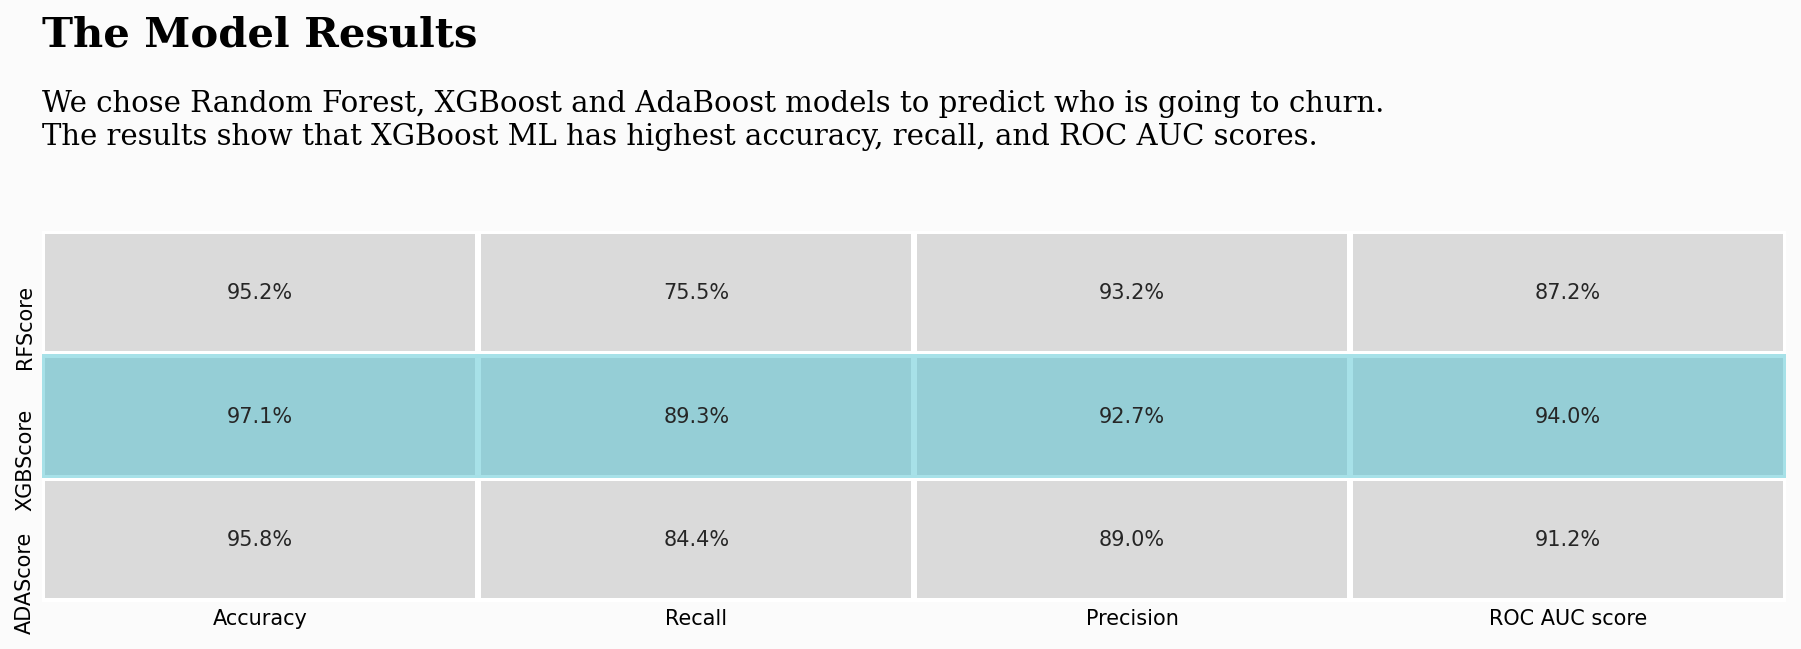

In [135]:
import matplotlib

fig = plt.figure(figsize=(15, 18), dpi=150)
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(final_models_df.T, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'The Model Results', fontfamily='serif', fontsize=20, fontweight='bold')
ax0.text(0, -0.7, 'We chose Random Forest, XGBoost and AdaBoost models to predict who is going to churn. \nThe results show that XGBoost ML has highest accuracy, recall, and ROC AUC scores.',
        fontfamily='serif', fontsize=14)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((0, 1), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))

plt.show()

## Conclusion

In the project, the main goal was to analyze credit card customers' dataset and to predict who is going to churn or exist. 

#### __Data Cleaning & Wrangling__
In order to create graphs, we had to create income_group column, and droped two columns that we did not need, and rename some values. There were no missing values in the dataset. 



#### __Data Visualization__
We created each variable's histograms to see the data patterns (or differences) between churn and existing customers. Although churn and existing groups showed similarities in a lot of features, there were differences between two groups on __Total_Revolving_Bal, Total_Ct_Chng_Q4_Q4, Total_Trans_Ct, Total_Trans_Amt__. 

- __Total_Revolving_Bal__: Both groups show binomial distributions, but Exist group shows steady state distribution until 2500-2600 balance range. 

- __Total_Ct_Chng_Q4_Q1__: Both groups look similar but they have different medians.

- __Total_Trans_Ct__: it shows binomial distribution on exist group, while churn group has a normal distribution. 

- __Total_Trans_Amt__: Exist group has binomial distribution, but Churn group shows right-skewed distribution. 

Furthermore, we can see correlationships between variables:
- __Positive Relationship__:
    - Customer_Age vs. Months_on_book
    - Avg_Open_To_Buy vs. Credit_Limit
    - Avg_Utilization_Ratio vs. Total_Revolving_Bal
    - Total_Trans_Ct vs. Total_trans_Amt
    - Total_Ct_Chang_Q4_Q1 vs. Total_Amt_Chng_Q4_Q1
  
- __Negative Relationship__:
    - Avg_Utilization_Ratio vs. Credit_Limit
    - Avg_Utilization_Ratio vs. Avg_Open_To_Buy
    
    
#### __Models__
We compared 6 models (Logistic Regression, Support Vector Machine, KNeighbor, Random Forest (RF), AdaBoost (ADA), and XGBoost (XGB)) by using results' matrics (Accuracy, Recall, Precision, and ROC AUC score). Given the results, we chose three models (RF, ADA, XGB) and tuned hyperparameters to find best parameters. __XGBoost__ model showed best results compared to other models. 